### Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. 
### Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels, and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

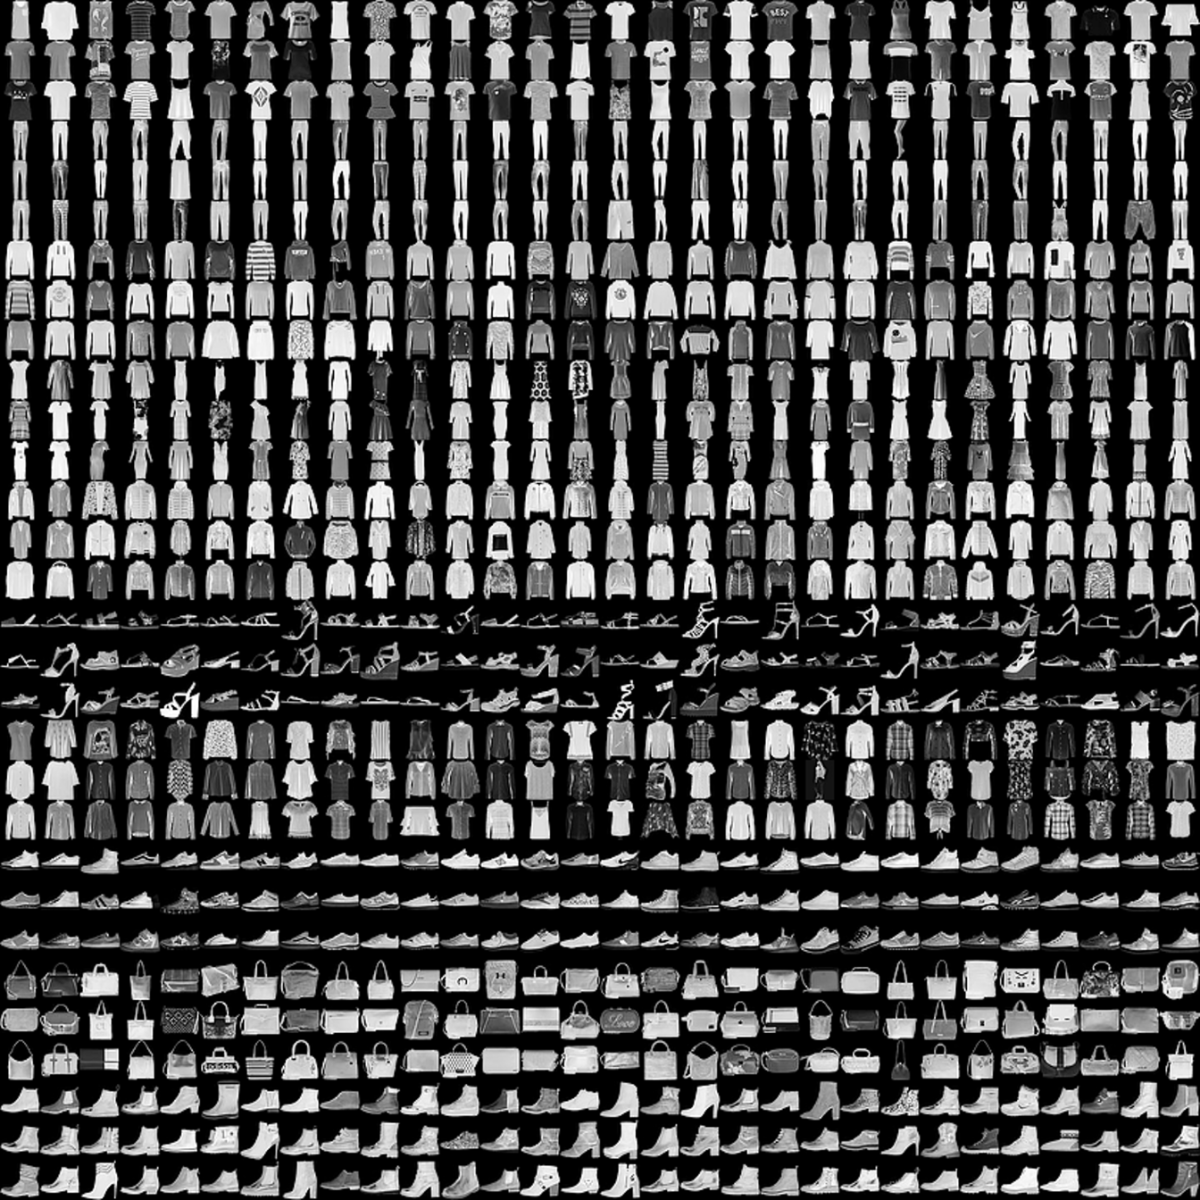

In [3]:
from IPython.display import Image
Image("./FMNIST.png")

In [5]:
import numpy as np
import pandas as pd 
train_data=pd.read_csv('./fashion-mnist_train.csv')
train_data.head()

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [6]:
test_data=pd.read_csv('./fashion-mnist_test.csv')
test_data.head()
#this dataset we are not going to use

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      0       0       0       0       0       0       0       0       9   
1      1       0       0       0       0       0       0       0       0   
2      2       0       0       0       0       0       0      14      53   
3      2       0       0       0       0       0       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       8  ...       103        87        56         0         0         0   
1       0  ...        34         0         0         0         0         0   
2      99  ...         0         0         0         0        63        53   
3       0  ...       137       126       140         0       133       224   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0  
1         0         0         0         0  
2        31         0         0         0  
3       222        56         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

### There are 785 columns, 1st column is for label which has values ranging from 0 to 9 and remaining 784 columns have pixel values for 28x28 image (28x28=784).

##### There are 10 different classes of images, as following:

* T-shirt/top
* Trouser
* Pullover
* Dress
* Coat
* Sandal
* Shirt
* Sneaker
* Bag
* Ankle boot
 #### We have 60K of such labeled images.

In [9]:
print("Train dataset shape:{}".format(train_data.shape))
print("Test dataset shape:{}".format(test_data.shape))

Train dataset shape:(60000, 785)
Test dataset shape:(10000, 785)


In [10]:
Y = train_data['label']
X = train_data.drop("label",axis=1)

In [11]:
Y.shape

(60000,)

In [12]:
X.shape

(60000, 784)

### So we can see we have 784 dimensions

In [13]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [14]:
pca= PCA(n_components=16)
X_reduced = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_reduced, Y, test_size=0.2, random_state=0)

X_reduced.shape

(60000, 16)

In [15]:
x_recovered=pca.inverse_transform(X_reduced)
x_recovered.shape
#x_recovered its the train data before we down to 25 dimension- it means it has pictures 28x28

(60000, 784)

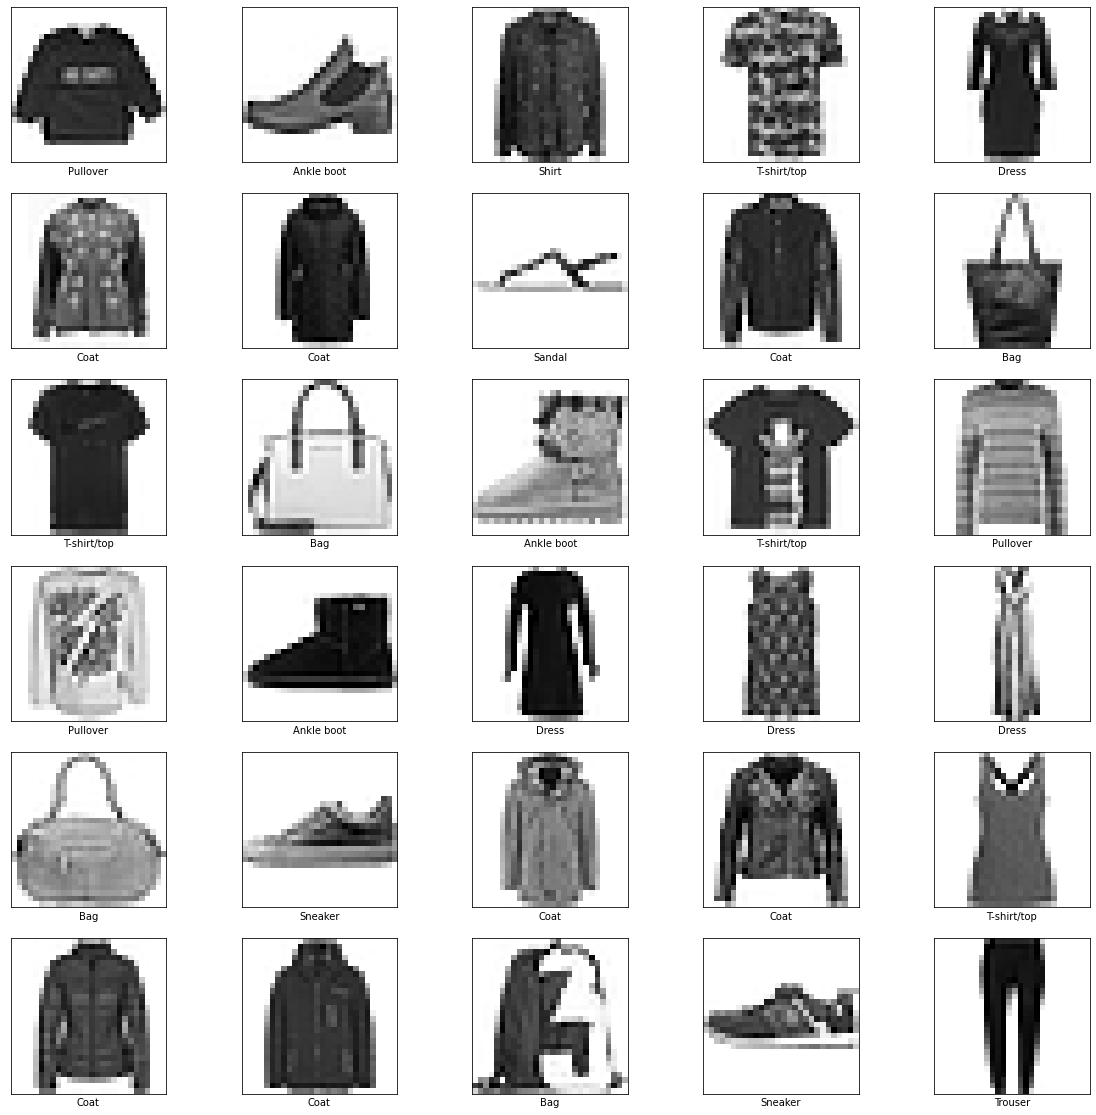

In [54]:
#lets see the picturs before the PCA
label = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
target = train_data[['label']].iloc[:, :]
plt.figure(figsize=(20,20))
# Show only the first 30 pictures
for i in range(30):
    plt.subplot(6,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.array(train_data.drop(['label'],axis=1).iloc[i, :]).reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(label[target.label.iloc[i]])
#pictures with 784 dimensions

<function matplotlib.pyplot.show(*args, **kw)>

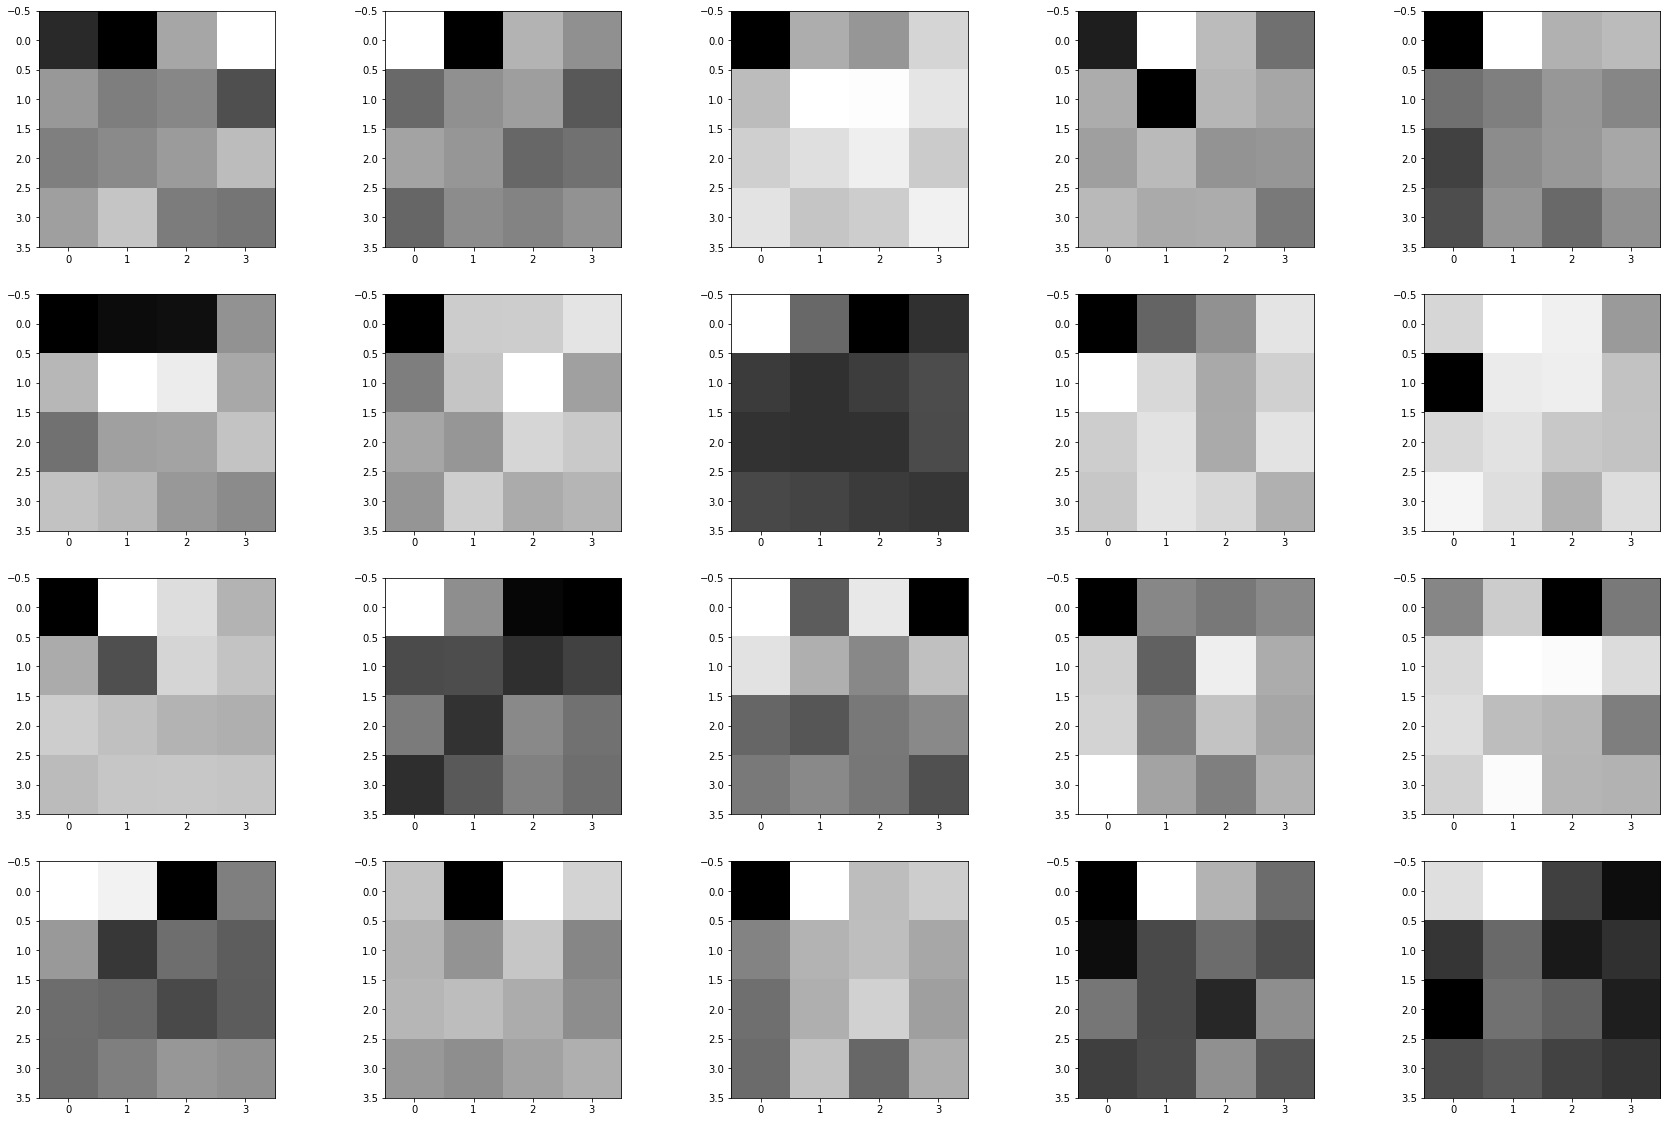

In [162]:
plt.figure(figsize=(30,20))

for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(X_reduced[i].reshape(4,4), cmap="gist_yarg")

plt.show
#pictures with 16 dimensions

### and now we have 16 dimensions, we can see the different of the Images quality

In [35]:
pd.DataFrame(data=y_train)


label
5778       5
5287       4
57167      0
29516      0
58610      1
...      ...
45891      5
52416      7
42613      0
43567      9
2732       1

[48000 rows x 1 columns]

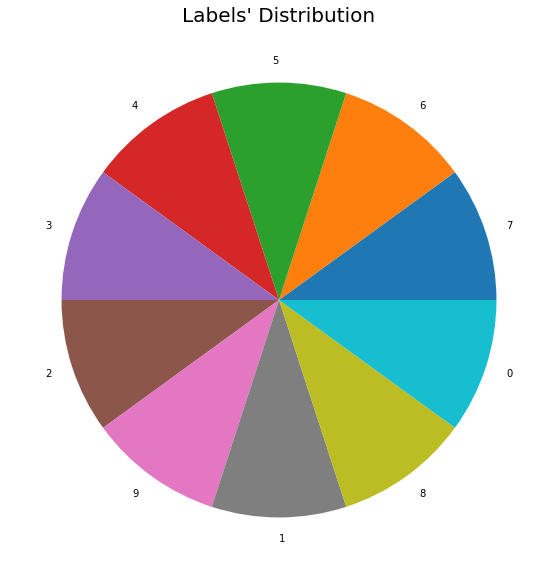

<Figure size 432x288 with 0 Axes>

In [41]:
#Graph: plotting how many labels there are, in every kind-
import matplotlib.pyplot as plt
#price distribution of apps
plt.figure(figsize=(10, 10))
axes= test_data.label.value_counts().plot(kind='pie')
axes.set_title("Labels' Distribution", fontsize=20)
axes.set_xlabel("")
axes.set_ylabel("")

fig1 = plt.gcf()
plt.show()
plt.draw()


# We can see that they are divided equally:

## now we will use diffrent Models to classify the data

In [3]:
#training and predicting on the PCA-d data using-
#K-Neighbors
#Decision Tree
#Random Forest
#AdaBoost
#Gradient Boosting
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
import xgboost as xgb
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
import seaborn as sns

# KNN

Confusion Matrix for KNN


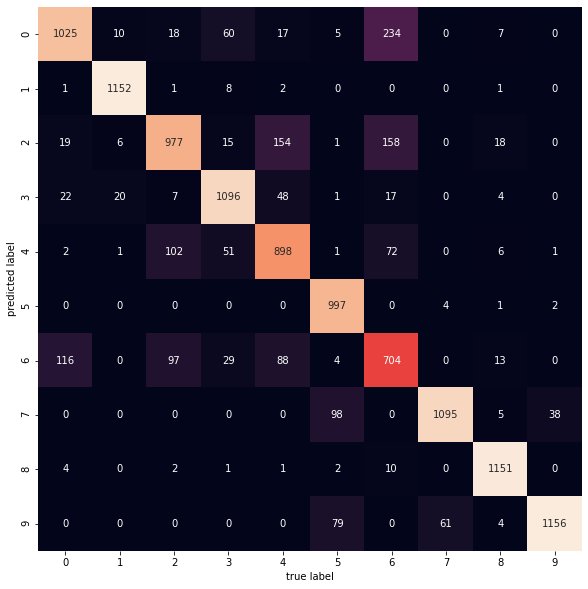

In [44]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)
y_pred=knn.predict(X_test)
plt.figure(1, figsize= (10,10))
cm=confusion_matrix(y_test, y_pred, labels=None, sample_weight=None)
print("Confusion Matrix for KNN")
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()
plt.close() 

In [164]:
 print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.83      0.78      1189
           1       0.97      0.96      0.97      1189
           2       0.68      0.76      0.71      1204
           3       0.87      0.86      0.86      1260
           4       0.72      0.71      0.72      1208
           5       0.93      0.88      0.91      1188
           6       0.66      0.54      0.59      1195
           7       0.88      0.90      0.89      1160
           8       0.97      0.94      0.96      1210
           9       0.91      0.94      0.92      1197

    accuracy                           0.83     12000
   macro avg       0.83      0.83      0.83     12000
weighted avg       0.83      0.83      0.83     12000



In [165]:
score= cross_val_score(knn, X_test, y_test, cv=4,scoring='accuracy')
print("This KNN model's Accuracy Score with cross validation is ", score)

This KNN model's Accuracy Score with cross validation is  [0.80333333 0.79833333 0.80933333 0.80133333]


In [166]:
knn.score(X_test, y_test)

0.8315

# DecisionTree

Confusion Matrix for Decision Tree


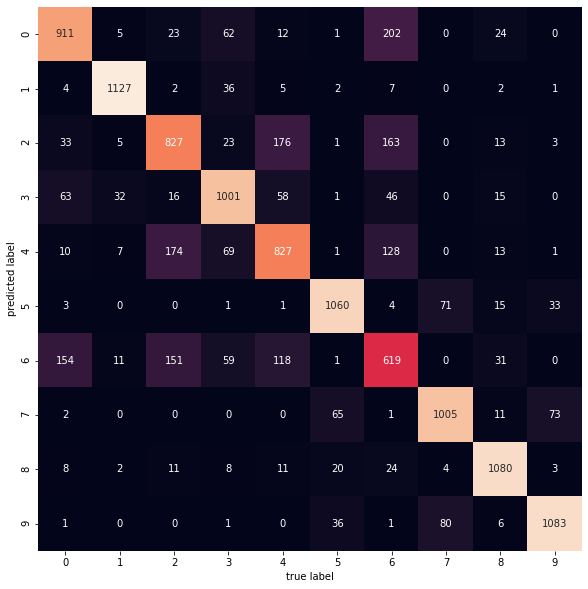

In [45]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc.score(X_test, y_test)
y_pred=dtc.predict(X_test)
plt.figure(1, figsize= (10,10))
cm=confusion_matrix(y_test, y_pred, labels=None, sample_weight=None)
print("Confusion Matrix for Decision Tree")
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()
plt.close() 

In [168]:
 print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71      1189
           1       0.94      0.94      0.94      1189
           2       0.66      0.64      0.65      1204
           3       0.79      0.79      0.79      1260
           4       0.63      0.63      0.63      1208
           5       0.86      0.86      0.86      1188
           6       0.46      0.50      0.48      1195
           7       0.86      0.85      0.85      1160
           8       0.90      0.88      0.89      1210
           9       0.88      0.90      0.89      1197

    accuracy                           0.77     12000
   macro avg       0.77      0.77      0.77     12000
weighted avg       0.77      0.77      0.77     12000



In [169]:
dtc.score(X_test, y_test)

0.7679166666666667

# GradientBoosting

In [46]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbc.score(X_test, y_test)

0.8705833333333334

# AdaBoost

In [47]:
adb=AdaBoostClassifier()
adb.fit(X_train, y_train)
adb.score(X_test, y_test)
y_pred=adb.predict(X_test)
print(classification_report(y_test,y_pred))
print(adb.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.14      0.00      0.00      1189
           1       0.70      0.10      0.18      1189
           2       0.23      0.75      0.36      1204
           3       0.39      0.62      0.48      1260
           4       0.37      0.33      0.35      1208
           5       0.64      0.80      0.71      1188
           6       0.24      0.04      0.07      1195
           7       0.58      0.69      0.63      1160
           8       0.86      0.83      0.84      1210
           9       0.93      0.50      0.65      1197

    accuracy                           0.47     12000
   macro avg       0.51      0.47      0.43     12000
weighted avg       0.51      0.47      0.43     12000

0.467


# xgboost

In [180]:
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)
xgb_clf.score(X_test, y_test)

0.8098532296501594

# Stacking

In [49]:
estimators = [('KNN',knn),
             ('DT',dtc),
               ('ADB',adb)]
reg = StackingClassifier(estimators=estimators,final_estimator=AdaBoostClassifier(random_state=1))
reg.fit(X_train, y_train).score(X_test, y_test)

0.5448333333333333

##  In conclusion

In [191]:
data = {'KNeighbors':  ['83%'],
        'DecisionTree': ['76%'],
        'GradientBoosting':['82%'],
        'AdaBoost':['48%'],
        'xgboost':['80%'],
        'stacking': ['54%']
        
        }
df = pd.DataFrame (data, columns = ['KNeighbors','DecisionTree','GradientBoosting','AdaBoost','xgboost','stacking']
                   ,index=['accuracy'])
df

KNeighbors DecisionTree GradientBoosting AdaBoost xgboost
accuracy        83%          76%              82%      48%     80%

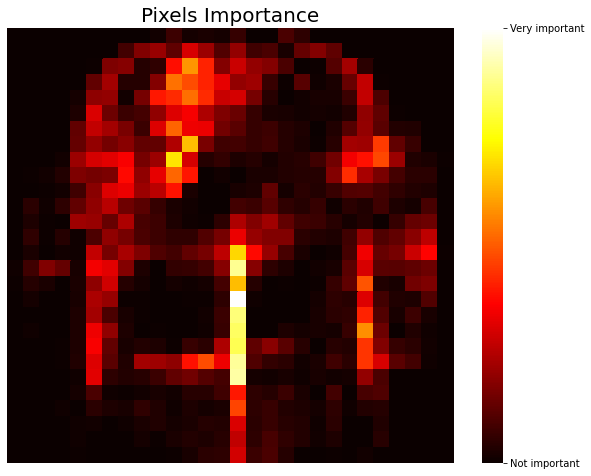

In [38]:
#PLOTTING PIXELS IMPORATNCE! BY RANDOM FORESTS

model = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
model.fit(X, Y) #on the ORIGINAL dataset (features: X! so we won't lose features according to the PCA procedure)

importances = model.feature_importances_
pixels = np.reshape(importances,(28,28)) #since the shape of the dataset is (60000,728)

plt.figure(figsize= (10,8))
plot = sns.heatmap(pixels,cmap=plt.cm.hot)
plt.xticks([], [])
plot.set_yticks([])
plot.set_yticks([], minor=True)
colorbar = plot.collections[0].colorbar
colorbar.set_ticks([0,max(importances)])
colorbar.set_ticklabels(['Not important','Very important'])
plt.title('Pixels Importance',size = 20)
plt.show()

In [17]:
#Now we will use KNN on the ORIGINAL data.(we used this model on the PCA data)
#we use KNN because it has the highest accuracy percentages
#Let's compare the model's results according to the datas!


knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X,Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print('KNN classifier on the ORIGINAL data results in:')
print("\n The Model's Score is %.3f" % knn.score(X_test, y_test))
y_pred = knn.predict(X_test)
cm=confusion_matrix(y_test, y_pred, labels=None, sample_weight=None)
print(cm)
print(classification_report(y_test,y_pred))

#seeing this, the model works better on the PCA-d data. since it has less features..

KNN classifier on the ORIGINAL data results in:

 The Model's Score is 0.920
[[1117    0    4   11    1    0   55    0    1    0]
 [   7 1171    2    8    1    0    0    0    0    0]
 [  12    2 1084    4   58    0   43    0    1    0]
 [  41    3   10 1168   25    0   13    0    0    0]
 [  10    1  103   27 1021    0   44    0    2    0]
 [   3    0    0    1    1 1090    3   50    1   39]
 [ 123    1   96   13   35    0  921    0    6    0]
 [   0    0    0    0    0    2    0 1129    0   29]
 [   4    0   16    5    2    0    7    4 1170    2]
 [   0    0    0    0    0    3    0   23    0 1171]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      1189
           1       0.99      0.98      0.99      1189
           2       0.82      0.90      0.86      1204
           3       0.94      0.93      0.94      1260
           4       0.89      0.85      0.87      1208
           5       1.00      0.92      0.95      1188
           6 

### We can see an increase  of 10 percent in the accuracy!!! its mean that lowering the dimensions does lower the accuracy but not significantly (remember that we lowered from 784 to 16 !!!)

In [21]:
#now let's predict on the test data
y_test = test_data['label']
x_test= test_data.drop("label",axis=1)
y_pred = knn.predict(x_test)
y_pred

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.87      0.80      1000
           1       0.99      0.97      0.98      1000
           2       0.74      0.82      0.78      1000
           3       0.91      0.87      0.89      1000
           4       0.81      0.77      0.79      1000
           5       0.99      0.82      0.90      1000
           6       0.68      0.59      0.63      1000
           7       0.88      0.94      0.91      1000
           8       0.98      0.95      0.97      1000
           9       0.88      0.97      0.92      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

